In [3]:
import nest_asyncio
from ib_insync import IB, Stock, util

# Allow nested asyncio loops
nest_asyncio.apply()

# Initialize IB instance
ib = IB()
ib.connect('127.0.0.1', 7496, clientId=1)

contract = Stock('ROKU', 'NASDAQ', 'USD')  # Must specify exchange (not SMART)
bars = ib.reqHistoricalData(
    contract,
    endDateTime='',
    durationStr='1 Y',
    barSizeSetting='1 day',
    whatToShow='TRADES',
    useRTH=True  # Regular Trading Hours only
)

# Convert to DataFrame and save
df = util.df(bars)[["date", "volume"]]
df.to_csv("ROKU_IBKR_Volume.csv")

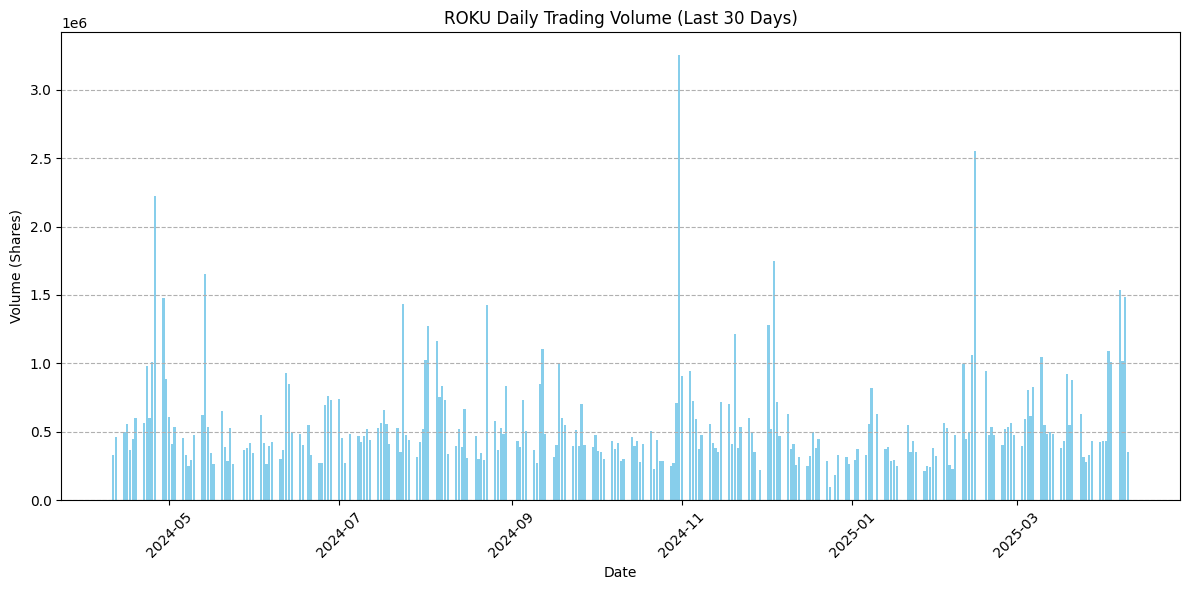

In [4]:
# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.bar(df['date'], df['volume'], color='skyblue', width=0.8)
plt.title('ROKU Daily Trading Volume (Last 30 Days)')
plt.xlabel('Date')
plt.ylabel('Volume (Shares)')
plt.grid(axis='y', linestyle='--')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

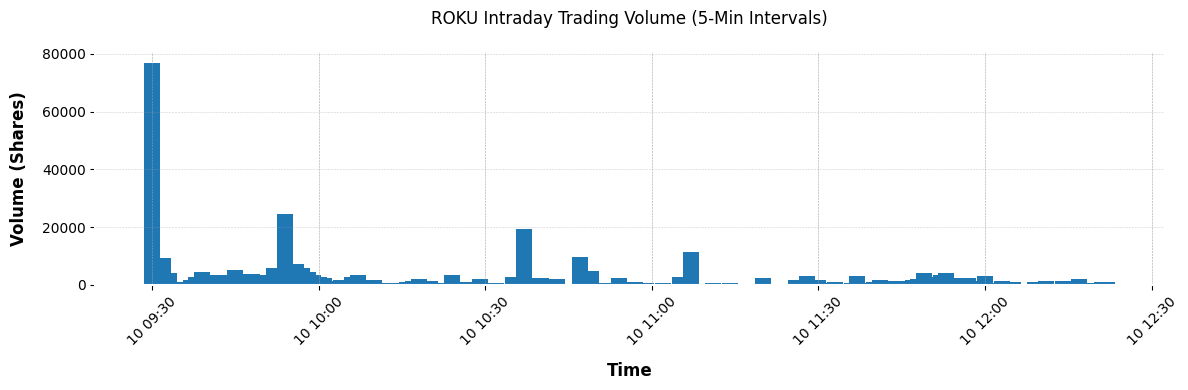

In [ ]:
import pandas as pd

# Convert to DataFrame and keep only volume
df = util.df(bars)[['date', 'volume']]
df['date'] = pd.to_datetime(df['date'])

plt.figure(figsize=(12, 4))
plt.bar(df['date'], df['volume'], 
        width=0.002,  # Adjust for time gaps
        color='#1f77b4',  # Muted blue
        edgecolor='none')

# Formatting
plt.title('ROKU Intraday Trading Volume (5-Min Intervals)', pad=20)
plt.xlabel('Time', labelpad=10)
plt.ylabel('Volume (Shares)', labelpad=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()

# Remove spines for cleaner look
for spine in ['top', 'right']:
    plt.gca().spines[spine].set_visible(False)

plt.show()

In [ ]:
df

        Date   Volume  AvgTradeSize  Trades
0 2023-01-01  2248357           142   15833
1 2023-01-02  1930867           125   15446
2 2023-01-03  2323844           113   20564
3 2023-01-04  2761514           135   20455
4 2023-01-05  1882923           217    8677
